<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.938315,25.424805,76.095689,-67.402006,111.056802,135.019116,-23.962314
1,0.0,1.0,61.624466,53.348080,35.219064,147.153209,307.344819,184.417432,122.927387
2,0.0,2.0,83.779820,45.810271,97.517204,-120.399364,116.707931,217.977391,-101.269461
3,0.0,3.0,67.760719,34.414047,64.162757,-75.488988,100.848536,151.508056,-50.659521
4,0.0,4.0,72.579875,65.606364,26.876092,-95.794477,79.267854,212.414172,-133.146319
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.938551,29.397389,84.890200,7.190297,190.416437,153.166349,37.250088
29996,999.0,26.0,54.120514,20.664720,43.124051,4.859737,132.769023,112.173906,20.595117
29997,999.0,27.0,61.163963,24.418856,34.565462,46.915953,177.064234,109.836925,67.227309
29998,999.0,28.0,77.971135,38.305932,51.099404,-26.452608,150.923864,137.412068,13.511795


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.938315,25.424805,76.095689,-67.402006,111.056802,135.019116,-23.962314
1,0.0,1.0,61.624466,53.348080,35.219064,147.153209,307.344819,184.417432,122.927387
2,0.0,2.0,83.779820,45.810271,97.517204,-120.399364,116.707931,217.977391,-101.269461
3,0.0,3.0,67.760719,34.414047,64.162757,-75.488988,100.848536,151.508056,-50.659521
4,0.0,4.0,72.579875,65.606364,26.876092,-95.794477,79.267854,212.414172,-133.146319
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.938551,29.397389,84.890200,7.190297,190.416437,153.166349,37.250088
29996,999.0,26.0,54.120514,20.664720,43.124051,4.859737,132.769023,112.173906,20.595117
29997,999.0,27.0,61.163963,24.418856,34.565462,46.915953,177.064234,109.836925,67.227309
29998,999.0,28.0,77.971135,38.305932,51.099404,-26.452608,150.923864,137.412068,13.511795


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    66.938315  25.424805  ...  135.019116  -23.962314
      1.0    61.624466  53.348080  ...  184.417432  122.927387
      2.0    83.779820  45.810271  ...  217.977391 -101.269461
      3.0    67.760719  34.414047  ...  151.508056  -50.659521
      4.0    72.579875  65.606364  ...  212.414172 -133.146319
...                ...        ...  ...         ...         ...
999.0 25.0   58.938551  29.397389  ...  153.166349   37.250088
      26.0   54.120514  20.664720  ...  112.173906   20.595117
      27.0   61.163963  24.418856  ...  109.836925   67.227309
      28.0   77.971135  38.305932  ...  137.412068   13.511795
      29.0   46.444690  64.177930  ...  169.544521 -202.667276

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    66.938315  25.424805  ...  135.019116  -23.962314
      1.0    61.624466  53.348080  ...  184.417432  122.927387
      2.0    83.779820  45.810271  ...  217.977391 -101.269461
      3.0    67.760719  34.414047  ...  151.508056  -50.659521
      4.0    72.579875  65.606364  ...  212.414172 -133.146319
...                ...        ...  ...         ...         ...
999.0 25.0   58.938551  29.397389  ...  153.166349   37.250088
      26.0   54.120514  20.664720  ...  112.173906   20.595117
      27.0   61.163963  24.418856  ...  109.836925   67.227309
      28.0   77.971135  38.305932  ...  137.412068   13.511795
      29.0   46.444690  64.177930  ...  169.544521 -202.667276

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.938315,25.424805,76.095689,-67.402006,111.056802,135.019116,-23.962314
1,0.0,1.0,61.624466,53.348080,35.219064,147.153209,307.344819,184.417432,122.927387
2,0.0,2.0,83.779820,45.810271,97.517204,-120.399364,116.707931,217.977391,-101.269461
3,0.0,3.0,67.760719,34.414047,64.162757,-75.488988,100.848536,151.508056,-50.659521
4,0.0,4.0,72.579875,65.606364,26.876092,-95.794477,79.267854,212.414172,-133.146319
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.938551,29.397389,84.890200,7.190297,190.416437,153.166349,37.250088
29996,999.0,26.0,54.120514,20.664720,43.124051,4.859737,132.769023,112.173906,20.595117
29997,999.0,27.0,61.163963,24.418856,34.565462,46.915953,177.064234,109.836925,67.227309
29998,999.0,28.0,77.971135,38.305932,51.099404,-26.452608,150.923864,137.412068,13.511795


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    66.938315  25.424805  ...  135.019116  -23.962314
      1.0    61.624466  53.348080  ...  184.417432  122.927387
      2.0    83.779820  45.810271  ...  217.977391 -101.269461
      3.0    67.760719  34.414047  ...  151.508056  -50.659521
      4.0    72.579875  65.606364  ...  212.414172 -133.146319
...                ...        ...  ...         ...         ...
999.0 25.0   58.938551  29.397389  ...  153.166349   37.250088
      26.0   54.120514  20.664720  ...  112.173906   20.595117
      27.0   61.163963  24.418856  ...  109.836925   67.227309
      28.0   77.971135  38.305932  ...  137.412068   13.511795
      29.0   46.444690  64.177930  ...  169.544521 -202.667276

[30000 rows x 7 columns]

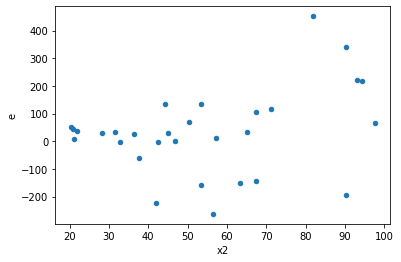

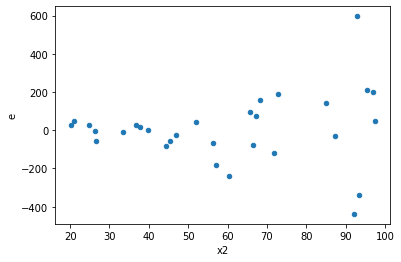

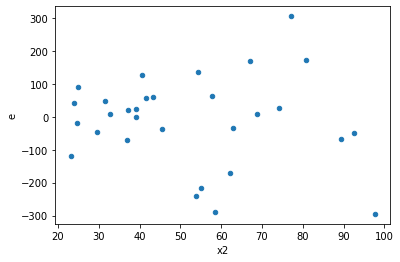

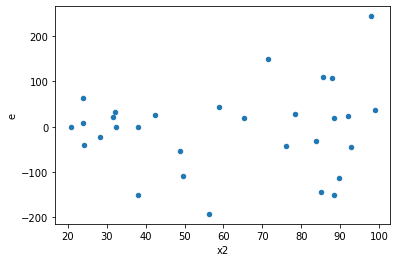

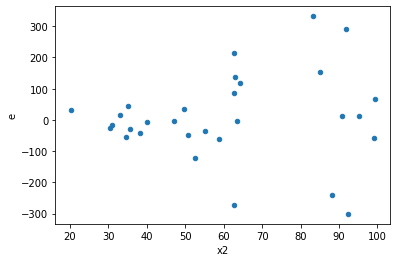

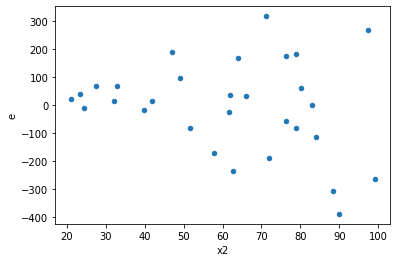

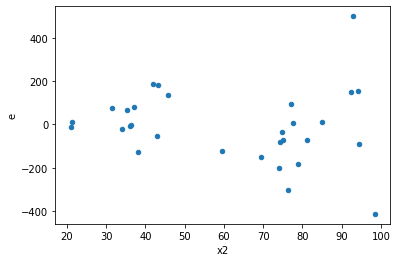

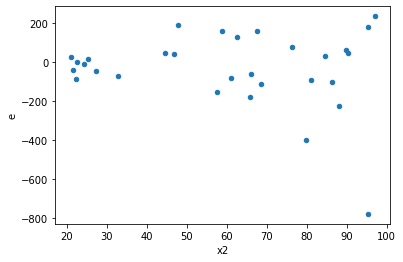

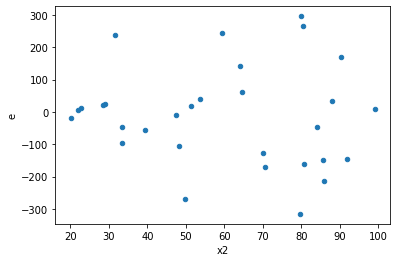

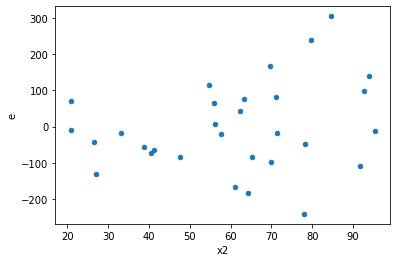

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,25730.444317816156,377392.1420578285,2858.9382575351283,41932.46022864761,14.667144391148984,0.00046053795650813356,0.9997697310217459,0.00023026897825406678,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,43285.88455131922,172595.5987151503,4809.542727924358,19177.28874612781,3.987341381704307,0.05150062545381462,0.9742496872730927,0.02575031272690731,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,120777.50495789158,744020.5051623423,13419.722773099063,82668.94501803804,6.1602572881576005,0.012345956710208439,0.9938270216448958,0.0061729783551042194,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,12913.905693752327,347141.520858021,1434.8784104169254,38571.280095335664,26.88121851671613,3.7405278761948324e-05,0.999981297360619,1.8702639380974162e-05,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,40631.58461879378,155052.95738724977,4514.620513199308,17228.106376361087,3.8160696621103827,0.05884167753587399,0.970579161232063,0.029420838767936996,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,37132.390209711906,244865.14815284166,4125.821134412434,27207.238683649073,6.594381529708197,0.009716723496722146,0.9951416382516389,0.004858361748361073,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,4038.5252990010536,339383.62589135877,448.7250332223393,37709.291765706526,84.03652342485182,2.6554312593241036e-07,0.999999867228437,1.3277156296620518e-07,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,23227.0598658837,864760.2271644829,2580.7844295426335,96084.46968494255,37.23072279305817,9.296956190452121e-06,0.9999953515219048,4.648478095226061e-06,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,16974.669421247585,367624.69724001014,1886.0743801386207,40847.188582223345,21.657252233722193,9.285442882078776e-05,0.9999535727855896,4.642721441039388e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,25730.444317816156,377392.1420578285,2858.9382575351283,41932.46022864761,14.667144391148984,0.00046053795650813356,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,43285.88455131922,172595.5987151503,4809.542727924358,19177.28874612781,3.987341381704307,0.05150062545381462,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,120777.50495789158,744020.5051623423,13419.722773099063,82668.94501803804,6.1602572881576005,0.012345956710208439,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,12913.905693752327,347141.520858021,1434.8784104169254,38571.280095335664,26.88121851671613,3.7405278761948324e-05,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,40631.58461879378,155052.95738724977,4514.620513199308,17228.106376361087,3.8160696621103827,0.05884167753587399,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,37132.390209711906,244865.14815284166,4125.821134412434,27207.238683649073,6.594381529708197,0.009716723496722146,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,4038.5252990010536,339383.62589135877,448.7250332223393,37709.291765706526,84.03652342485182,2.6554312593241036e-07,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,23227.0598658837,864760.2271644829,2580.7844295426335,96084.46968494255,37.23072279305817,9.296956190452121e-06,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,16974.669421247585,367624.69724001014,1886.0743801386207,40847.188582223345,21.657252233722193,9.285442882078776e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    748
Reject005=1 : Homoscedasticity      252
Name: Result_test, dtype: int64